In [1]:
import os 
import tensorflow as tf 
import pandas as pd 
import keras 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np

In [2]:
train_dir = "../data/10_food_classes_all_data/train/"
test_dir = "../data/10_food_classes_all_data/test/"

In [3]:
for directory, folders, files in os.walk(train_dir): 
    print(f"There are {len(folders)} folders and {len(files)} files in '{directory}'")

There are 10 folders and 0 files in '../data/10_food_classes_all_data/train/'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/chicken_curry'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/chicken_wings'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/fried_rice'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/grilled_salmon'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/hamburger'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/ice_cream'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/pizza'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/ramen'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/steak'
There are 0 folders and 750 files in '../data/10_food_classes_all_data/train/sushi'


In [4]:
class_names = np.array(sorted(os.listdir(train_dir)))

In [5]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [6]:
import random
def view_random_image(folderpath):
    class_names = sorted(os.listdir(folderpath)) 
    random_class = random.choice(class_names)
    path = os.path.join(folderpath, random_class)
    random_image = random.choice(os.listdir(path))
    imgpath = os.path.join(path, random_image)
    img = mpimg.imread(imgpath)
    plt.imshow(img)
    plt.title(f"{random_class} / {img.shape}")
    plt.axis("off")
    plt.show();
    

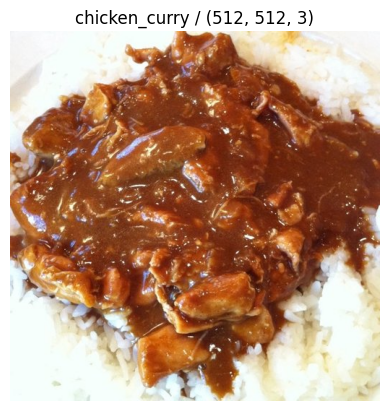

In [7]:
view_random_image(train_dir)

In [24]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, 
    image_size=IMG_SIZE, 
    batch_size=BATCH_SIZE, 
    # shuffle=False, 
    label_mode="categorical"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, 
    image_size=IMG_SIZE, 
    batch_size=BATCH_SIZE, 
    # shuffle=False, 
    label_mode="categorical"
)

# train_ds = train_ds.cache().shuffle(1000, reshuffle_each_iteration=True).prefetch(tf.data.AUTOTUNE)
# test_ds = test_ds.cache().prefetch(tf.data.AUTOTUNE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [32]:
## Model-1 

augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.1), 
    # keras.layers.RandomContrast(0.1), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomRotation(0.055), 
    keras.layers.RandomTranslation(0.1, 0.1), 
    keras.layers.RandomZoom(0.2)
], name="augmentation")

model_1 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)), 
    augmentation, 
    keras.layers.Rescaling(1./255.), 
    keras.layers.Conv2D(filters=10, 
                       kernel_size=3, 
                       activation='relu'), 
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(), 
    keras.layers.GlobalAveragePooling2D(), 
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
], name="Model_1") 


model_1.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name="acc"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ]
)


model_1.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 51, 51, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 49, 49, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 24, 24, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,940 (19.30 KB)

 Trainable params: 4,940 (19.30 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
import datetime 

lod_dir = os.path.join("logs/", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="loss", 
        patience=5, 
        restore_best_weights=True
    ), 
    keras.callbacks.ReduceLROnPlateau(
        monitor="loss", 
        patience=5,
        factor=0.5, 
        min_lr=1e-6, 
        verbose=1
    ), 
    keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(lod_dir, "best.keras"),
        monitor="loss",
        save_best_only=True,
    ), 
    keras.callbacks.TensorBoard(
        log_dir=lod_dir, 
        histogram_freq=0,
        write_graph=True,
        write_images=False,
        write_steps_per_second=False,
        update_freq='epoch',
        profile_batch=0,
        embeddings_freq=0,
        embeddings_metadata=None
    )
]

In [31]:
history_1 = model_1.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=150, 
                callbacks=callbacks, 
                verbose=1
            )

Epoch 1/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - acc: 0.4220 - loss: 1.4180 - top5_acc: 0.8494 - val_acc: 0.4230 - val_loss: 1.3849 - val_top5_acc: 0.8500 - learning_rate: 2.5000e-04
Epoch 2/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - acc: 0.4235 - loss: 1.4177 - top5_acc: 0.8503 - val_acc: 0.4245 - val_loss: 1.3837 - val_top5_acc: 0.8508 - learning_rate: 2.5000e-04
Epoch 3/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.4250 - loss: 1.4172 - top5_acc: 0.8511 - val_acc: 0.4260 - val_loss: 1.3956 - val_top5_acc: 0.8517 - learning_rate: 2.5000e-04
Epoch 4/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.4265 - loss: 1.4170 - top5_acc: 0.8519 - val_acc: 0.4275 - val_loss: 1.4049 - val_top5_acc: 0.8525 - learning_rate: 2.5000e-04
Epoch 5/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.4279 - loss: 1.4115 - top5_acc: 0.8527 - val_acc: 0.4289 - val_loss: 1.3787 - val_top5_acc: 0.8533 - learning_rate: 2.5000e-04
Epoch 6/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/s

In [ ]:
model_1.evaluate(test_ds)

<Axes: >

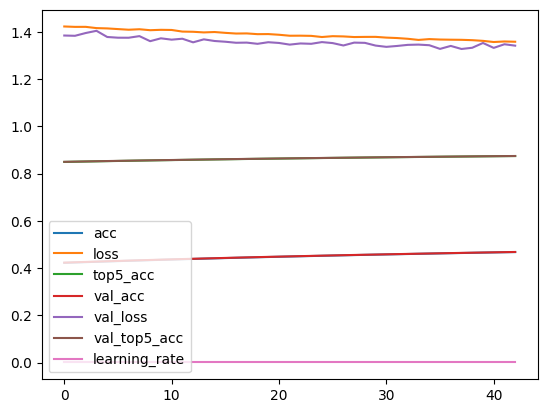

In [34]:
pd.DataFrame(history_1.history).plot()

In [35]:
## Model-2

augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.1), 
    # keras.layers.RandomContrast(0.1), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomRotation(0.055), 
    keras.layers.RandomTranslation(0.1, 0.1), 
    keras.layers.RandomZoom(0.2)
], name="augmentation")

model_2 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)), 
    augmentation, 
    keras.layers.Rescaling(1./255.), 
    keras.layers.Conv2D(filters=10, 
                       kernel_size=3, 
                       activation='relu'), 
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(), 
    keras.layers.GlobalAveragePooling2D(), 
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
], name="Model_1") 


model_2.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name="acc"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ]
)


model_2.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 51, 51, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 49, 49, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 24, 24, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,940 (19.30 KB)

 Trainable params: 4,940 (19.30 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history_2 = model_2.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=30, 
                callbacks=callbacks, 
                verbose=1
            )

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - acc: 0.0949 - loss: 2.3031 - top5_acc: 0.5004 - val_acc: 0.0962 - val_loss: 2.3022 - val_top5_acc: 0.4936 - learning_rate: 0.0010
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - acc: 0.0989 - loss: 2.3014 - top5_acc: 0.4971 - val_acc: 0.1055 - val_loss: 2.2909 - val_top5_acc: 0.5077 - learning_rate: 0.0010
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - acc: 0.1100 - loss: 2.2931 - top5_acc: 0.5155 - val_acc: 0.1137 - val_loss: 2.2735 - val_top5_acc: 0.5254 - learning_rate: 0.0010
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - acc: 0.1159 - loss: 2.2797 - top5_acc: 0.5312 - val_acc: 0.1204 - val_loss: 2.2340 - val_top5_acc: 0.5447 - learning_rate: 0.0010
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - acc: 0.1235 - loss: 2.2289 - top5_acc: 0.5517 - val_acc: 0.1292 - val_loss: 2.1906 - val_top5_acc: 0.5645 - learning_rate: 0.0010
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - acc: 0.1324 - loss:

## How to overcome overfitting  

1. Get more data
2. Simplify the model
   * Reduce number of layers
   * Reduce number of hidden units
3. Use data augmentation
4. Use transfer learning  - Leverage the patterns another model has learned on similar data

<Axes: >

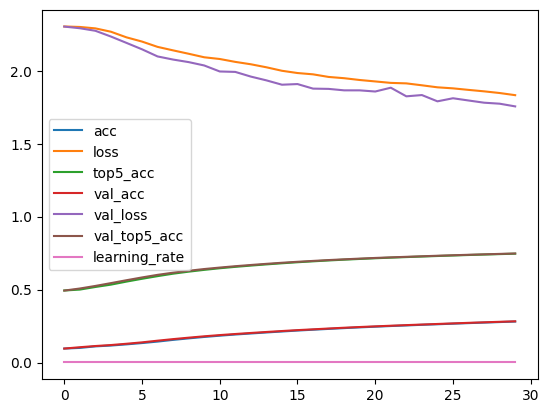

In [37]:
pd.DataFrame(history_2.history).plot()

In [38]:
## Model-2

augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.1), 
    # keras.layers.RandomContrast(0.1), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomRotation(0.055), 
    keras.layers.RandomTranslation(0.1, 0.1), 
    keras.layers.RandomZoom(0.2)
], name="augmentation")

model_3 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)), 
    augmentation, 
    keras.layers.Rescaling(1./255.), 
    keras.layers.Conv2D(filters=10, 
                       kernel_size=3, 
                       activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(), 
    keras.layers.GlobalAveragePooling2D(), 
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
], name="Model_1") 


model_3.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name="acc"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ]
)


model_3.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_8 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,210 (8.63 KB)

 Trainable params: 2,210 (8.63 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history_3 = model_3.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=30, 
                # callbacks=callbacks, 
                verbose=1
            )

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - acc: 0.1869 - loss: 2.2309 - top5_acc: 0.6638 - val_acc: 0.1844 - val_loss: 2.2244 - val_top5_acc: 0.6619
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.1838 - loss: 2.2193 - top5_acc: 0.6614 - val_acc: 0.1836 - val_loss: 2.1957 - val_top5_acc: 0.6606
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - acc: 0.1839 - loss: 2.2019 - top5_acc: 0.6604 - val_acc: 0.1847 - val_loss: 2.1774 - val_top5_acc: 0.6602
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.1851 - loss: 2.1846 - top5_acc: 0.6602 - val_acc: 0.1867 - val_loss: 2.1300 - val_top5_acc: 0.6615
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - acc: 0.1876 - loss: 2.1544 - top5_acc: 0.6625 - val_acc: 0.1895 - val_loss: 2.0985 - val_top5_acc: 0.6648
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.1907 - loss: 2.1211 - top5_acc: 0.6662 - val_acc: 0.1926 - val_loss: 2.0925 - val_top5_acc: 0.6689
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━

In [43]:
## Model-2

augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.1), 
    # keras.layers.RandomContrast(0.1), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomRotation(0.055), 
    keras.layers.RandomTranslation(0.1, 0.1), 
    keras.layers.RandomZoom(0.2)
], name="augmentation")

model_4 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)), 
    augmentation, 
    keras.layers.Rescaling(1./255.), 
    keras.layers.Conv2D(filters=10, 
                       kernel_size=3, 
                       activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(10, 3, activation="relu"), 
    keras.layers.MaxPool2D(),
    keras.layers.GlobalAveragePooling2D(), 
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
], name="Model_4") 


model_4.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name="acc"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ]
)


model_4.summary()

Model: "Model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_10 (Rescaling)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,300 (5.08 KB)

 Trainable params: 1,300 (5.08 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history_4 = model_4.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=30, 
                # callbacks=callbacks, 
                verbose=1
            )

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - acc: 0.1050 - loss: 2.3016 - top5_acc: 0.5088 - val_acc: 0.1144 - val_loss: 2.2921 - val_top5_acc: 0.5347
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - acc: 0.1177 - loss: 2.2809 - top5_acc: 0.5394 - val_acc: 0.1313 - val_loss: 2.2370 - val_top5_acc: 0.5717
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - acc: 0.1362 - loss: 2.2149 - top5_acc: 0.5841 - val_acc: 0.1498 - val_loss: 2.1902 - val_top5_acc: 0.6070
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - acc: 0.1552 - loss: 2.1786 - top5_acc: 0.6145 - val_acc: 0.1654 - val_loss: 2.1601 - val_top5_acc: 0.6282
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - acc: 0.1693 - loss: 2.1610 - top5_acc: 0.6336 - val_acc: 0.1764 - val_loss: 2.1479 - val_top5_acc: 0.6432
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.1795 - loss: 2.1468 - top5_acc: 0.6470 - val_acc: 0.1850 - val_loss: 2.1363 - val_top5_acc: 0.6542
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━

In [47]:
model_5 = keras.models.clone_model(model_1)
model_5.compile(
    loss="categorical_crossentropy", 
    optimizer=keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

model_5.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 51, 51, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 49, 49, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 24, 24, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,940 (19.30 KB)

 Trainable params: 4,940 (19.30 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history_5 = model_5.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=30, 
                # callbacks=callbacks, 
                verbose=1
            )

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.1013 - loss: 2.3017 - val_accuracy: 0.1096 - val_loss: 2.2850
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.1324 - loss: 2.2795 - val_accuracy: 0.1972 - val_loss: 2.2236
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.1992 - loss: 2.1996 - val_accuracy: 0.2300 - val_loss: 2.1374
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.2307 - loss: 2.1435 - val_accuracy: 0.2552 - val_loss: 2.0901
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.2376 - loss: 2.1235 - val_accuracy: 0.2784 - val_loss: 2.0542
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2521 - loss: 2.1005 - val_accuracy: 0.2680 - val_loss: 2.0508
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.2685 - loss: 2.0785 - val_accuracy: 0.2880 - val_loss: 2.0350
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.2772 - loss: 2.0706 - val_accu

<Axes: >

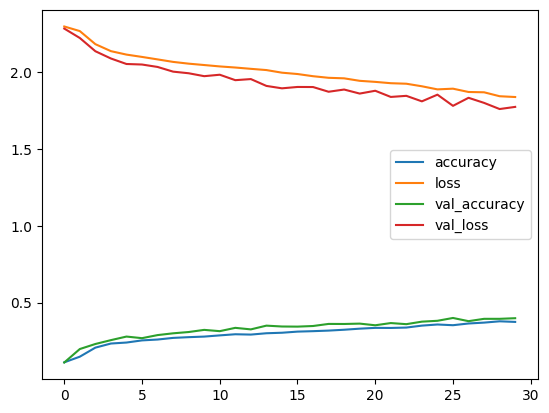

In [49]:
pd.DataFrame(history_5.history).plot()

In [52]:
model_6 = keras.models.clone_model(model_5)

model_6 = keras.models.clone_model(model_1)
model_6.compile(
    loss="categorical_crossentropy", 
    optimizer=keras.optimizers.Adam(learning_rate=0.0005), 
    metrics=["accuracy"]
)

model_6.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 51, 51, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 49, 49, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 24, 24, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,940 (19.30 KB)

 Trainable params: 4,940 (19.30 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history_6 = model_6.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=15, 
                # callbacks=callbacks, 
                verbose=1
            )

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.1090 - loss: 2.3010 - val_accuracy: 0.1252 - val_loss: 2.2755
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.1359 - loss: 2.2607 - val_accuracy: 0.1768 - val_loss: 2.2156
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.1768 - loss: 2.2165 - val_accuracy: 0.2096 - val_loss: 2.1646
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.2035 - loss: 2.1835 - val_accuracy: 0.2456 - val_loss: 2.1216
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.2264 - loss: 2.1496 - val_accuracy: 0.2588 - val_loss: 2.0960
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2456 - loss: 2.1166 - val_accuracy: 0.2760 - val_loss: 2.0595
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.2490 - loss: 2.1019 - val_accuracy: 0.2908 - val_loss: 2.0388
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2589 - loss: 2.0825 -

KeyboardInterrupt: 

In [56]:
## Model-2

augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.1), 
    # keras.layers.RandomContrast(0.1), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomRotation(0.055), 
    keras.layers.RandomTranslation(0.1, 0.1), 
    keras.layers.RandomZoom(0.2)
], name="augmentation")

model_7 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)), 
    augmentation, 
    keras.layers.Rescaling(1./255.), 
    keras.layers.Conv2D(filters=64, 
                       kernel_size=3, 
                       activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(64, 3, activation="relu"), 
    keras.layers.MaxPool2D(),
    keras.layers.GlobalAveragePooling2D(), 
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
], name="Model_7") 


model_7.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name="acc"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ]
)


model_7.summary()

Model: "Model_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_12 (Rescaling)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_12     │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,370 (153.79 KB)

 Trainable params: 39,370 (153.79 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history_7 = model_7.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=15, 
                # callbacks=callbacks, 
                verbose=1
            )

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - acc: 0.1094 - loss: 2.2837 - top5_acc: 0.5150 - val_acc: 0.1521 - val_loss: 2.2145 - val_top5_acc: 0.6012
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - acc: 0.1659 - loss: 2.1783 - top5_acc: 0.6174 - val_acc: 0.1870 - val_loss: 2.1361 - val_top5_acc: 0.6484
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - acc: 0.1945 - loss: 2.1287 - top5_acc: 0.6579 - val_acc: 0.2062 - val_loss: 2.0979 - val_top5_acc: 0.6741
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - acc: 0.2112 - loss: 2.1020 - top5_acc: 0.6804 - val_acc: 0.2184 - val_loss: 2.0812 - val_top5_acc: 0.6912
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - acc: 0.2219 - loss: 2.0908 - top5_acc: 0.6955 - val_acc: 0.2272 - val_loss: 2.0666 - val_top5_acc: 0.7028
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - acc: 0.2296 - loss: 2.0761 - top5_acc: 0.7060 - val_acc: 0.2342 - val_loss: 2.0566 - val_top5_acc: 0.7115
Epoch 7/15
235/235 ━━━━━━━━━

In [58]:
## Model-2

augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.1), 
    # keras.layers.RandomContrast(0.1), 
    keras.layers.RandomFlip("horizontal"), 
    keras.layers.RandomRotation(0.055), 
    keras.layers.RandomTranslation(0.1, 0.1), 
    keras.layers.RandomZoom(0.2)
], name="augmentation")

model_8 = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)), 
    augmentation, 
    keras.layers.Rescaling(1./255.), 
    keras.layers.Conv2D(filters=128, 
                       kernel_size=3, 
                       activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(128, 3, activation="relu"), 
    keras.layers.MaxPool2D(),
    keras.layers.GlobalAveragePooling2D(), 
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
], name="Model_8") 


model_8.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.CategoricalAccuracy(name="acc"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5_acc"),
    ]
)


model_8.summary()

Model: "Model_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_13 (Rescaling)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 222, 222, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 109, 109, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_13     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,458 (595.54 KB)

 Trainable params: 152,458 (595.54 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history_8 = model_8.fit(
                train_ds, 
                validation_data=test_ds, 
                epochs=15, 
                # callbacks=callbacks, 
                verbose=1
            )

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - acc: 0.1420 - loss: 2.2705 - top5_acc: 0.5561 - val_acc: 0.1715 - val_loss: 2.1848 - val_top5_acc: 0.6245
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - acc: 0.1813 - loss: 2.1674 - top5_acc: 0.6408 - val_acc: 0.1957 - val_loss: 2.1230 - val_top5_acc: 0.6675
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - acc: 0.2021 - loss: 2.1327 - top5_acc: 0.6755 - val_acc: 0.2110 - val_loss: 2.1362 - val_top5_acc: 0.6878
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - acc: 0.2143 - loss: 2.1025 - top5_acc: 0.6914 - val_acc: 0.2230 - val_loss: 2.0564 - val_top5_acc: 0.7012
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - acc: 0.2276 - loss: 2.0825 - top5_acc: 0.7053 - val_acc: 0.2341 - val_loss: 2.0508 - val_top5_acc: 0.7120
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - acc: 0.2368 - loss: 2.0689 - top5_acc: 0.7147 - val_acc: 0.2416 - val_loss: 2.0349 - val_top5_acc: 0.7197
Epoch 7/15
235/235 ━━━━━━━━━